In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
import os

path = os.listdir('C:/Users/mahmo/Documents/Final_Year_Project/Tomato_Data_Set/')
classes = {'Tomato___Bacterial_spot':0, 'Tomato___Early_blight':1,'Tomato___Late_blight':2,'Tomato___Leaf_Mold':3,
          'Tomato___Septoria_leaf_spot':4,'Tomato___Spider_mites Two-spotted_spider_mite':5,'Tomato___Target_Spot':6,
          'Tomato___Tomato_Yellow_Leaf_Curl_Virus':7,'Tomato___Tomato_mosaic_virus':8,'Tomato___healthy':9}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'C:/Users/mahmo/Documents/Final_Year_Project/Tomato_Data_Set/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (256,256))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [5]:
np.unique(Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
pd.Series(Y).value_counts()

6    1000
4      41
0      40
1      40
2      40
3      40
5      40
9      40
7      39
8      39
dtype: int64

In [7]:
X.shape, X_updated.shape

((1359, 256, 256), (1359, 65536))

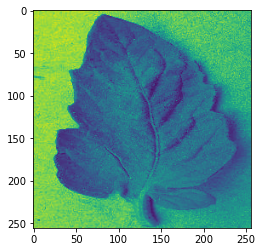

In [8]:
plt.imshow(X[0])

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1359, 65536)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((1087, 65536), (272, 65536))

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
import warnings
warnings.filterwarnings('ignore')

# LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lg = LogisticRegression(C=0.1)

In [16]:
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [17]:
lg.predict_proba(xtest)

array([[1.63270304e-03, 4.36661713e-05, 4.08736717e-04, ...,
        4.04033740e-05, 3.52013348e-07, 3.28796048e-05],
       [2.77657741e-04, 6.64358093e-06, 4.86755390e-04, ...,
        8.95360152e-05, 1.91718989e-03, 1.20458829e-04],
       [1.04888034e-02, 2.02574442e-04, 1.23302772e-04, ...,
        8.04810967e-03, 7.50940704e-04, 4.01224174e-06],
       ...,
       [2.18237338e-02, 8.61885465e-03, 4.30116834e-03, ...,
        6.58539373e-03, 4.08890061e-05, 8.96010379e-04],
       [1.14582540e-03, 7.56276391e-06, 7.88194402e-04, ...,
        9.95511313e-05, 8.06985743e-05, 3.09414789e-03],
       [3.49574093e-03, 8.22159687e-05, 4.74577651e-04, ...,
        1.94244004e-04, 3.13528293e-05, 1.24758614e-06]])

In [18]:
lg_predict=lg.predict(xtest)
lg_predict 

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 9, 6, 3, 6,
       6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       1, 6, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6,
       6, 3, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 9, 6, 6, 6, 6, 6,
       6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 3, 2, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 3, 6, 6, 9, 2, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6,
       6, 6, 9, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6,
       7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 1, 6, 6, 6, 6, 6, 6])

In [19]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 0.9972401103955841
Testing Score: 0.6911764705882353


In [53]:
con_matrix = confusion_matrix(ytest, lg_predict)
con_matrix

array([[  0,   0,   0,   0,   0,   0,   8,   0,   0,   0],
       [  0,   0,   0,   3,   0,   0,   5,   2,   0,   0],
       [  0,   1,   0,   0,   0,   0,   3,   0,   0,   1],
       [  0,   0,   1,   1,   0,   0,   9,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   3,   0,   1,   1],
       [  0,   1,   0,   0,   0,   0,   9,   1,   0,   0],
       [  4,   0,   1,   2,   0,   0, 185,   0,   0,   1],
       [  0,   1,   0,   2,   0,   1,   7,   0,   0,   1],
       [  0,   0,   0,   2,   0,   0,   9,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   4,   0,   0,   1]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

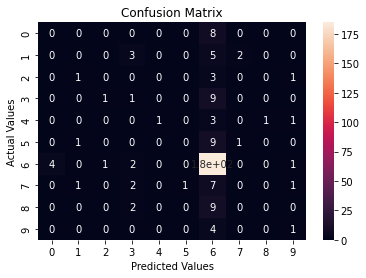

In [54]:
sns.heatmap(con_matrix, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [20]:
accuracy_score(ytest, lg_predict)

0.6911764705882353

# SVM

In [21]:
from sklearn.svm import SVC

In [22]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [23]:
sv_predict = sv.predict(xtest)
sv_predict

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 2, 6, 6, 6, 6, 6, 9, 6, 6, 6, 6, 6, 6, 9, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6])

In [24]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.8252069917203312
Testing Score: 0.7205882352941176


In [57]:
con_matrix = confusion_matrix(ytest,sv_predict)
con_matrix

array([[  0,   0,   0,   0,   0,   0,   8,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  10,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,   4,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  11,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   4,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,  11,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 193,   0,   0,   0],
       [  0,   0,   2,   0,   1,   0,   8,   0,   0,   1],
       [  0,   0,   1,   0,   0,   0,  10,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   4,   0,   0,   1]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

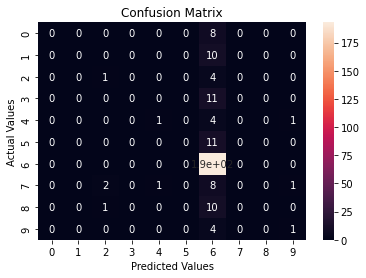

In [58]:
sns.heatmap(con_matrix, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [25]:
accuracy_score(ytest, sv_predict)

0.7205882352941176

# KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
neighbor = KNeighborsClassifier(n_neighbors=5)
neighbor.fit(xtrain,ytrain)

KNeighborsClassifier()

In [27]:
knn_classifier_pred = neighbor.predict(xtest)
knn_classifier_pred

array([0, 3, 6, 6, 6, 9, 0, 2, 6, 0, 0, 7, 6, 6, 0, 0, 6, 6, 3, 6, 0, 0,
       3, 3, 2, 6, 6, 1, 0, 6, 6, 9, 0, 6, 2, 6, 0, 6, 0, 6, 6, 6, 6, 0,
       6, 0, 3, 2, 6, 4, 6, 6, 3, 2, 6, 0, 6, 6, 0, 6, 6, 6, 0, 6, 2, 6,
       3, 6, 2, 4, 6, 6, 0, 0, 6, 2, 6, 6, 6, 6, 6, 0, 6, 3, 6, 0, 6, 3,
       6, 2, 0, 9, 6, 6, 6, 0, 6, 6, 2, 2, 6, 6, 6, 2, 0, 0, 6, 0, 0, 0,
       6, 3, 3, 2, 6, 6, 2, 0, 0, 0, 6, 7, 0, 2, 6, 0, 0, 0, 6, 0, 6, 0,
       6, 0, 6, 2, 6, 6, 0, 0, 2, 9, 6, 0, 6, 6, 0, 0, 9, 6, 6, 0, 6, 6,
       6, 6, 6, 4, 6, 6, 6, 6, 9, 6, 0, 2, 0, 6, 0, 6, 6, 0, 0, 6, 6, 0,
       0, 6, 0, 6, 6, 3, 6, 6, 9, 3, 6, 7, 6, 6, 6, 6, 0, 6, 6, 6, 6, 0,
       6, 2, 2, 0, 6, 6, 0, 0, 6, 6, 6, 6, 0, 2, 6, 6, 4, 3, 0, 6, 6, 6,
       3, 6, 0, 0, 6, 6, 6, 6, 2, 6, 6, 6, 2, 0, 6, 3, 4, 0, 6, 6, 0, 0,
       6, 6, 6, 6, 0, 0, 6, 6, 4, 9, 0, 6, 0, 7, 6, 6, 6, 0, 6, 6, 0, 0,
       6, 6, 6, 0, 6, 6, 0, 6])

In [28]:
print("Training Score:", neighbor.score(xtrain, ytrain))
print("Testing Score:", neighbor.score(xtest, ytest))

Training Score: 0.6366145354185833
Testing Score: 0.5073529411764706


In [29]:
from sklearn.metrics import accuracy_score

In [59]:
con_matrix = confusion_matrix(ytest,knn_classifier_pred)
con_matrix

array([[  8,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  6,   0,   0,   3,   0,   0,   1,   0,   0,   0],
       [  0,   0,   1,   1,   0,   0,   3,   0,   0,   0],
       [  3,   0,   2,   4,   0,   0,   0,   0,   0,   2],
       [  0,   0,   1,   0,   2,   0,   2,   0,   0,   1],
       [  3,   0,   1,   1,   1,   0,   4,   1,   0,   0],
       [ 47,   1,  10,   6,   3,   0, 122,   2,   0,   2],
       [  4,   0,   4,   0,   0,   0,   3,   0,   0,   1],
       [  1,   0,   4,   1,   0,   0,   3,   1,   0,   1],
       [  2,   0,   0,   0,   0,   0,   2,   0,   0,   1]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

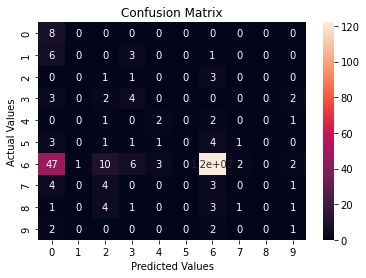

In [60]:
sns.heatmap(con_matrix, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [30]:
accuracy_score(ytest, knn_classifier_pred)

0.5073529411764706

# Decision Tree

In [31]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt_clf = DecisionTreeClassifier()

In [33]:
dt_clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [34]:
dt_clf_pred = dt_clf.predict(xtest)
dt_clf_pred

array([6, 6, 1, 6, 6, 6, 7, 6, 6, 3, 6, 6, 6, 5, 9, 9, 6, 6, 3, 6, 1, 4,
       6, 8, 6, 5, 6, 1, 6, 6, 6, 6, 5, 6, 6, 0, 6, 7, 6, 6, 6, 0, 3, 0,
       6, 6, 6, 6, 6, 5, 3, 6, 6, 6, 1, 8, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 1, 6, 6, 6, 1, 2, 6, 6, 6, 6, 6, 9, 8, 3, 6, 2, 6, 6,
       6, 6, 6, 0, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 3, 4, 6, 6, 6, 6, 6, 6,
       6, 6, 0, 4, 6, 6, 6, 6, 6, 6, 6, 5, 6, 4, 6, 6, 6, 1, 6, 2, 6, 6,
       6, 6, 6, 7, 6, 6, 6, 6, 6, 0, 6, 4, 2, 3, 6, 6, 0, 6, 6, 6, 5, 6,
       6, 2, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 3, 6, 6, 6, 6,
       6, 2, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 3, 6, 6, 6, 6,
       4, 6, 3, 3, 0, 7, 6, 6, 6, 6, 6, 8, 6, 9, 6, 6, 7, 1, 6, 6, 3, 1,
       6, 5, 6, 6, 8, 6, 6, 6, 3, 6, 9, 6, 6, 6, 6, 6, 8, 6, 6, 6, 5, 6,
       2, 6, 6, 6, 6, 6, 0, 6])

In [35]:
print("Training Score:", dt_clf.score(xtrain, ytrain))
print("Testing Score:", dt_clf.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.5882352941176471


In [64]:
con_matrix = confusion_matrix(ytest,dt_clf_pred)
con_matrix

array([[  0,   0,   0,   2,   0,   0,   5,   1,   0,   0],
       [  1,   2,   0,   0,   1,   0,   5,   0,   1,   0],
       [  0,   0,   0,   1,   0,   0,   2,   2,   0,   0],
       [  1,   0,   1,   2,   1,   0,   5,   0,   1,   0],
       [  1,   0,   0,   1,   1,   0,   2,   1,   0,   0],
       [  1,   0,   0,   0,   0,   0,  10,   0,   0,   0],
       [  5,   6,   3,   5,   1,   8, 155,   1,   6,   3],
       [  1,   1,   2,   1,   0,   0,   5,   0,   0,   2],
       [  0,   1,   1,   2,   1,   0,   5,   0,   0,   1],
       [  1,   1,   0,   0,   1,   0,   2,   0,   0,   0]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

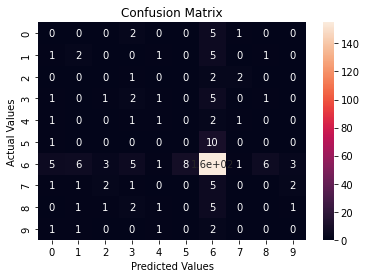

In [65]:
sns.heatmap(con_matrix, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [36]:
accuracy_score(ytest, dt_clf_pred)

0.5882352941176471

# Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB , GaussianNB, BernoulliNB

# MultinomialNB

In [38]:
multi = MultinomialNB()
multi.fit(xtrain, ytrain)

MultinomialNB()

In [39]:
multi_predict = multi.predict(xtest)
multi_predict

array([2, 8, 5, 6, 6, 9, 1, 9, 1, 1, 0, 0, 1, 1, 2, 6, 5, 1, 9, 6, 1, 9,
       1, 3, 9, 1, 6, 7, 5, 3, 6, 9, 4, 5, 5, 6, 1, 0, 3, 5, 5, 6, 1, 1,
       8, 1, 6, 4, 4, 1, 1, 1, 1, 6, 1, 1, 0, 1, 0, 0, 0, 7, 0, 0, 4, 5,
       0, 8, 9, 9, 0, 1, 6, 1, 6, 9, 3, 0, 1, 1, 0, 0, 0, 8, 0, 1, 1, 3,
       8, 3, 0, 1, 1, 7, 1, 5, 1, 8, 6, 9, 5, 8, 8, 4, 7, 6, 6, 5, 1, 1,
       6, 3, 1, 9, 8, 7, 1, 0, 1, 5, 6, 2, 6, 8, 6, 0, 6, 3, 8, 6, 6, 0,
       1, 0, 1, 9, 5, 1, 5, 6, 9, 9, 6, 9, 0, 8, 1, 1, 9, 6, 5, 2, 0, 3,
       1, 3, 1, 0, 5, 1, 7, 1, 1, 6, 5, 9, 6, 1, 0, 0, 1, 1, 6, 8, 6, 1,
       1, 9, 6, 2, 6, 3, 1, 6, 9, 2, 5, 8, 0, 8, 1, 7, 4, 6, 5, 5, 6, 1,
       0, 2, 9, 0, 8, 0, 5, 1, 5, 8, 0, 6, 1, 2, 8, 6, 0, 3, 0, 6, 0, 7,
       3, 8, 6, 6, 5, 1, 0, 5, 1, 1, 8, 1, 1, 6, 5, 3, 9, 0, 1, 3, 2, 5,
       0, 5, 8, 6, 0, 6, 8, 1, 8, 9, 5, 3, 2, 2, 6, 6, 1, 1, 4, 6, 4, 6,
       0, 0, 1, 0, 3, 1, 6, 7])

In [40]:
print("Training Score:", multi.score(xtrain, ytrain))
print("Testing Score:", multi.score(xtest, ytest))

Training Score: 0.2907083716651334
Testing Score: 0.21691176470588236


In [41]:
accuracy_score(ytest, multi_predict)

0.21691176470588236

# BernoulliNB

In [42]:
ber = BernoulliNB()
ber.fit(xtrain, ytrain)

BernoulliNB()

In [43]:
ber_predict = ber.predict(xtest)
ber_predict

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6])

In [44]:
print("Training Score:", ber.score(xtrain, ytrain))
print("Testing Score:", ber.score(xtest, ytest))

Training Score: 0.7424103035878565
Testing Score: 0.7132352941176471


In [66]:
con_matrix = confusion_matrix(ytest,ber_predict)
con_matrix

array([[  0,   0,   0,   0,   0,   0,   8,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  10,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,   4,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  11,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   6,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  11,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 193,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  12,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  11,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   5,   0,   0,   0]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

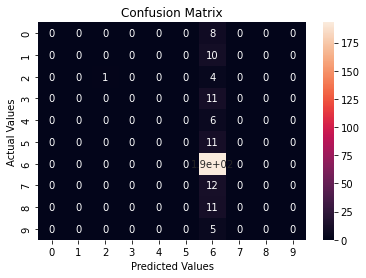

In [67]:
sns.heatmap(con_matrix, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [45]:
accuracy_score(ytest, ber_predict)

0.7132352941176471

# GaussianNB

In [46]:
gau = GaussianNB()

In [47]:
gau.fit(xtrain, ytrain)

GaussianNB()

In [48]:
gau_predict = gau.predict(xtest)
gau_predict

array([6, 8, 5, 6, 5, 0, 0, 9, 1, 7, 5, 5, 5, 5, 8, 7, 8, 6, 1, 6, 3, 9,
       6, 0, 4, 4, 6, 1, 5, 6, 6, 9, 9, 0, 8, 6, 9, 5, 2, 0, 5, 6, 5, 6,
       8, 0, 6, 8, 4, 4, 1, 1, 8, 6, 1, 1, 6, 5, 6, 6, 5, 1, 8, 5, 2, 5,
       6, 8, 9, 4, 6, 1, 6, 1, 6, 8, 6, 5, 6, 1, 6, 6, 6, 7, 6, 3, 6, 8,
       8, 4, 0, 0, 1, 7, 6, 6, 6, 0, 5, 9, 0, 6, 8, 8, 7, 6, 6, 0, 0, 1,
       6, 3, 0, 2, 8, 6, 5, 6, 1, 5, 6, 6, 5, 8, 6, 0, 6, 3, 2, 2, 6, 0,
       6, 6, 1, 8, 5, 4, 0, 6, 6, 0, 6, 9, 6, 8, 7, 6, 9, 6, 5, 6, 6, 4,
       5, 4, 6, 4, 5, 4, 8, 6, 6, 6, 0, 9, 0, 6, 0, 6, 5, 0, 0, 7, 6, 0,
       1, 6, 6, 6, 6, 3, 6, 6, 9, 0, 8, 8, 6, 7, 1, 7, 4, 6, 5, 5, 6, 1,
       6, 8, 9, 1, 8, 6, 6, 1, 5, 6, 6, 6, 1, 6, 6, 6, 6, 3, 6, 6, 5, 6,
       2, 8, 0, 6, 5, 5, 5, 5, 6, 5, 6, 1, 6, 6, 8, 6, 4, 0, 1, 6, 0, 6,
       5, 5, 8, 5, 5, 0, 6, 5, 4, 0, 0, 4, 2, 6, 5, 6, 1, 1, 6, 7, 9, 6,
       4, 4, 1, 5, 4, 6, 9, 6])

In [49]:
print("Training Score:", gau.score(xtrain, ytrain))
print("Testing Score:", gau.score(xtest, ytest))

Training Score: 0.5087396504139834
Testing Score: 0.39705882352941174


In [50]:
accuracy_score(ytest, gau_predict)

0.39705882352941174